In [45]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

In [48]:
class TSP():
    def __init__(self, popl_size):
        self.map = np.full((14,14), 10000)
        self.map = pd.DataFrame(self.map)
        self.map.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']
        self.map.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']

        self.add_city('a', 'g', 15)
        self.add_city('a', 'j', 20)
        self.add_city('a', 'l', 12)
        self.add_city('b', 'h', 19)
        self.add_city('b', 'i', 40)
        self.add_city('b', 'n', 13)
        self.add_city('c', 'd', 60)
        self.add_city('c', 'e', 22)
        self.add_city('c', 'f', 40)
        self.add_city('c', 'i', 20)
        self.add_city('d', 'f', 21)
        self.add_city('d', 'k', 30)
        self.add_city('e', 'i', 18)
        self.add_city('f', 'k', 37)
        self.add_city('f', 'l', 60)
        self.add_city('f', 'm', 26)
        self.add_city('f', 'n', 90)
        self.add_city('g', 'k', 55)
        self.add_city('g', 'l', 18)
        self.add_city('h', 'j', 56)
        self.add_city('h', 'n', 17)
        self.add_city('i', 'n', 60)
        self.add_city('j', 'l', 16)
        self.add_city('j', 'n', 50)
        self.add_city('k', 'm', 24)
        self.add_city('l', 'm', 40)

        self.popl_size = popl_size
        self.population = self.generate_popl()

        self.fitness_popl = self.generate_fit()
        self.best_fit = max(self.fitness_popl)
        self.fit_graph = [self.best_fit]

        self.cost_popl = self.generate_cost()
        self.best_cost = min(self.cost_popl)
        self.cost_graph = [self.best_cost]

        self.delta_cost = 0
        self.num_gen = 0

    def add_city(self, city1, city2, d):
        self.map[city1][city2] = d
        self.map[city2][city1] = d
    
    def path_cost(self, path):
        path = path + path[0]
        cost = 0
        for i in range(14):
            cost += self.distance(path[i], path[i+1])
        return cost
    
    def fitness(self, path):
        return 1/self.path_cost(path)
    
    def distance(self, city1, city2):
        return self.map[city1][city2]
    
    def generate_popl(self):
        path = 'abcdefghijklmn'
        population = [path]*self.popl_size
        return population
    
    def generate_fit(self):
        fitness_popl = [self.fitness(s) for s in self.population]
        return fitness_popl
    
    def generate_cost(self):
        cost_popl = [self.path_cost(s) for s in self.population]
        return cost_popl

    def crossover(self, mom, dad):
        c_1, c_2 = random.sample(range(14),2)
        c1, c2 = (min(c_1,c_2), max(c_1,c_2))
        for s in mom[c1:c2]:
            dad = dad.replace(s, '')
        child = dad[:c1] + mom[c1:c2] + dad[c1:]
        return child
    
    def mutate(self, child):
        c1, c2 = random.sample(range(14), 2)
        s1 = child[c1]
        s2 = child[c2]
        child = child[:c1] + s2 + child[c1+1:]
        child = child[:c2] + s1 + child[c2+1:]
        return child

    def selection(self):
        parents = random.choices(self.population, weights=self.fitness_popl, k=2)
        return parents

    def terminate(self):
        #if self.num_gen==500:
         #   return True
        if self.delta_cost==50:
            return True
        elif self.num_gen==5000:
            return True
        else: return False
    
    def genetic_algo(self):
        f = open("out.txt", "a")
        f.truncate(0)
        while (not self.terminate()):
            new_popl = []
            for i in range(self.popl_size):
                mom, dad = self.selection()
                child = self.crossover(mom, dad)
                if random.randint(0,100)<15:
                    child = self.mutate(child)
                new_popl.append(child)
                f.write(child + ' ')
            
            new_popl = list(set(new_popl))
            new_popl.sort(key=self.fitness, reverse=True)

            if self.path_cost(new_popl[0])==self.best_cost:
                self.delta_cost += 1
            else:
                self.delta_cost = 0 

            f.write('\n')
            self.population = new_popl

            self.fitness_popl = self.generate_fit()
            self.best_fit = max(self.fitness_popl)
            self.fit_graph.append(self.best_fit)

            self.cost_popl = self.generate_cost()
            self.best_cost = min(self.cost_popl)
            self.cost_graph.append(self.best_cost)

            self.num_gen += 1

            #print(self.best_cost, self.delta_cost)
        print(self.best_cost)
        return max(self.population, key=self.fitness)

In [49]:
t = TSP(20)

In [50]:
t.genetic_algo()
t.num_gen

374


513

In [53]:
c_graph = [i/100 for i in t.cost_graph]
print(c_graph)

[1201.0, 1201.0, 1101.13, 802.46, 702.32, 702.32, 702.44, 702.32, 702.36, 702.36, 602.79, 702.21, 602.79, 503.19, 502.89, 503.05, 503.13, 601.93, 602.83, 701.83, 701.83, 701.71, 702.07, 801.23, 702.02, 701.63, 701.97, 502.3, 502.3, 403.12, 502.74, 701.87, 602.39, 602.33, 601.85, 601.78, 502.68, 502.68, 502.68, 403.19, 403.19, 502.94, 602.32, 702.38, 602.72, 703.16, 802.34, 901.15, 702.47, 502.75, 502.72, 502.72, 602.69, 602.28, 602.58, 602.27, 701.81, 702.03, 701.61, 701.61, 703.15, 801.8, 801.89, 602.28, 701.78, 702.4, 602.24, 603.02, 603.02, 602.22, 503.22, 701.8, 502.86, 603.13, 602.84, 602.84, 801.41, 701.65, 702.54, 503.04, 602.14, 602.14, 502.36, 502.36, 403.56, 402.88, 402.88, 402.72, 403.16, 503.06, 503.06, 503.6, 503.19, 403.33, 403.33, 502.35, 402.84, 602.11, 602.11, 602.74, 403.09, 403.09, 602.94, 702.56, 702.78, 602.89, 702.14, 702.38, 603.33, 602.89, 602.23, 602.53, 702.28, 702.62, 602.55, 603.34, 603.34, 602.31, 702.27, 701.75, 701.75, 603.38, 703.16, 702.19, 602.6, 602.3

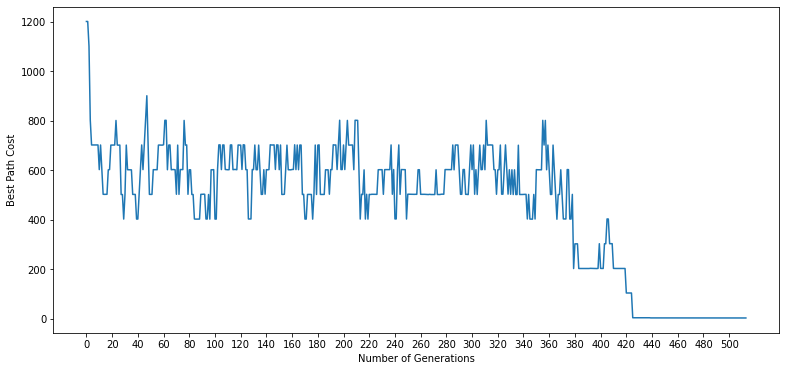

In [70]:
f = plt.figure()
f.set_figwidth(13)
f.set_figheight(6)
plt.plot(c_graph)
plt.xlabel('Number of Generations')
plt.ylabel('Best Path Cost')
plt.xticks(range(0,520,20))
plt.show()

In [66]:
k=0
for i in c_graph:
    if i<=3.75:
        k += 1
print(k)
print(c_graph[450])

51
4.01


In [44]:
generations = []
cost_g = []
for i in range(200):
    t = TSP(20)
    t.genetic_algo()
    generations.append(t.num_gen)
    cost_g.append(t.best_cost)

401
419
374
395
395
412
374
374
402
374
401
533
395
401
395
395
395
395
395
402
374
395
468
40300
468
374
401
374
395
533
395
533
374
412
374
401
401
401
395
395
401
401
395
401
374
395
374
468
401
395
374
374
401
412
395
395
395
395
395
401
395
395
401
374
374
374
395
401
395
401
374
468
374
395
395
374
395
401
374
419
395
374
374
533
10426
374
374
395
10369
374
374
395
374
401
374
374
374
374
412
395
533
374
374
468
395
374
10470
374
401
395
401
395
395
395
374
533
401
374
374
395
374
374
395
374
401
401
374
468
396
374
434
374
395
374
461
401
412
374
374
374
374
412
395
395
374
374
419
395
374
401
395
401
374
395
395
395
395
412
401
395
374
401
395
395
374
374
401
412
374
417
401
374
374
374
395
468
412
401
401
417
401
395
401
374
483
395
374
412
374
401
468
374
374
395
374
374
401
374
395
374


In [46]:
print(generations)
print(sum(generations)/200)
n = 0
for g in cost_g:
    if g==374:
        n += 1
print(n)
print(n*100/20)

[844, 297, 943, 1088, 2246, 267, 430, 1698, 1929, 1127, 1481, 1205, 1013, 3922, 1449, 519, 1221, 516, 807, 1741, 762, 77, 281, 5000, 598, 942, 721, 1302, 964, 555, 867, 457, 1512, 263, 1008, 2297, 886, 421, 2503, 315, 1325, 1373, 542, 1225, 773, 2418, 269, 2032, 874, 2701, 118, 2207, 1591, 1308, 248, 2173, 1260, 378, 2358, 1217, 714, 2814, 1425, 164, 387, 480, 602, 2812, 434, 189, 2373, 565, 523, 454, 402, 810, 974, 619, 2822, 1702, 497, 1389, 447, 331, 374, 2704, 995, 1196, 1071, 121, 226, 275, 174, 2507, 718, 288, 1263, 268, 1300, 268, 212, 2548, 814, 1094, 397, 3780, 660, 3141, 896, 1856, 575, 356, 1120, 704, 289, 879, 1494, 488, 398, 3736, 596, 527, 925, 346, 3876, 1306, 1648, 4037, 507, 2171, 957, 542, 152, 2099, 279, 1846, 651, 1301, 1132, 168, 521, 3737, 1037, 485, 345, 738, 3317, 329, 350, 1348, 2025, 641, 408, 561, 244, 211, 206, 800, 394, 2373, 1959, 494, 1110, 583, 1135, 514, 951, 852, 2044, 545, 824, 169, 635, 1288, 1513, 184, 1416, 753, 545, 908, 634, 280, 269, 1315, 270, 

In [47]:
print(min(generations), max(generations))

77 5000


In [10]:
#p = ''.join(random.sample('abcdefghijklmn', 14))
#print(p)
print(t.path_cost('jklnamhbgifecd'))

11001.009999999998


In [64]:
(513-87)*100/513

83.04093567251462

In [12]:
sum(p)

11001.009999999998

In [35]:
class Improved_TSP():
    def __init__(self, popl_size):
        self.map = np.full((14,14), 10000)
        self.map = pd.DataFrame(self.map)
        self.map.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']
        self.map.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']

        self.add_city('a', 'g', 15)
        self.add_city('a', 'j', 20)
        self.add_city('a', 'l', 12)
        self.add_city('b', 'h', 19)
        self.add_city('b', 'i', 40)
        self.add_city('b', 'n', 13)
        self.add_city('c', 'd', 60)
        self.add_city('c', 'e', 22)
        self.add_city('c', 'f', 40)
        self.add_city('c', 'i', 20)
        self.add_city('d', 'f', 21)
        self.add_city('d', 'k', 30)
        self.add_city('e', 'i', 18)
        self.add_city('f', 'k', 37)
        self.add_city('f', 'l', 60)
        self.add_city('f', 'm', 26)
        self.add_city('f', 'n', 90)
        self.add_city('g', 'k', 55)
        self.add_city('g', 'l', 18)
        self.add_city('h', 'j', 56)
        self.add_city('h', 'n', 17)
        self.add_city('i', 'n', 60)
        self.add_city('j', 'l', 16)
        self.add_city('j', 'n', 50)
        self.add_city('k', 'm', 24)
        self.add_city('l', 'm', 40)

        self.popl_size = popl_size
        self.population = self.generate_popl()

        self.fitness_popl = self.generate_fit()
        self.best_fit = max(self.fitness_popl)
        self.fit_graph = [self.best_fit]

        self.cost_popl = self.generate_cost()
        self.best_cost = min(self.cost_popl)
        self.cost_graph = [self.best_cost]

        self.delta_cost = 0
        self.num_gen = 0

    def add_city(self, city1, city2, d):
        self.map[city1][city2] = d
        self.map[city2][city1] = d
    
    def path_cost(self, path):
        path = path + path[0]
        cost = 0
        for i in range(14):
            cost += self.distance(path[i], path[i+1])
        return cost
    
    def fitness(self, path):
        return 1/self.path_cost(path)
    
    def distance(self, city1, city2):
        return self.map[city1][city2]
    
    def generate_popl(self):
        path = 'abcdefghijklmn'
        population = [path]*self.popl_size
        return population
    
    def generate_fit(self):
        fitness_popl = [self.fitness(s) for s in self.population]
        return fitness_popl
    
    def generate_cost(self):
        cost_popl = [self.path_cost(s) for s in self.population]
        return cost_popl

    def adj_matrix(self, mom, dad):
        d = {x: set() for x in mom}
        for i in range(14):
            d[mom[i]].add(mom[(i+1)%14])
            d[mom[i]].add(mom[i-1])
            d[dad[i]].add(dad[(i+1)%14])
            d[dad[i]].add(dad[i-1])
        return d
    
    def delete_nbour(self, am, x):
        for key in am:
            am[key].discard(x)
        return am

    def edge_recom_cross(self, mom, dad):
        parents = [mom, dad]
        children = []
        for p in parents:
            am = self.adj_matrix(mom, dad)
            curr = p[0]
            child = ''
            for p in range(13):
                child += curr
                self.delete_nbour(am, curr)
                if len(am[curr])!=0:
                    nxt = ''
                    min = 10
                    for x in am[curr]:
                        if len(am[x])<min:
                            nxt = x
                            min = len(am[x])
                        elif len(am[x])==min:
                            nxt += x
                    curr = random.choice(nxt)
                else:
                    nxt = [key for key in am if key not in child]
                    curr = random.choice(nxt)
            children.append(child+curr)
        return children
    
    def super_crossover(self, mom, dad):
        if random.randint(0,1)==0:
            return self.ordered_cross(mom, dad)
        else: return self.edge_recom_cross(mom, dad)

    def ordered_cross(self, mom, dad):
        cut1, cut2 = random.sample(range(8), 2)
        c1 = min(cut1,cut2)
        c2 = max(cut1,cut2)
        mom_keep = mom[c1:c2]
        dad_keep = dad[c1:c2]
        mom_left = mom
        dad_left = dad
        for i in range(c1, c2):
            mom_left = mom_left.replace(dad[i],'')
            dad_left = dad_left.replace(mom[i],'')
        son = mom_left[:c1] + dad_keep + mom_left[c1:]
        daughter = dad_left[:c1] + mom_keep + dad_left[c1:]
        return son, daughter

    def selection(self):
        #tournament style
        tournament = random.sample(self.population, k=self.popl_size//20)
        tournament.sort(key=self.fitness, reverse=True)
        return tournament[0], tournament[1]

    def two_opt_mutate(self, child):
        c_1, c_2 = random.sample(range(14), 2)
        c1 = min(c_1, c_2)
        c2 = max(c_1, c_2)
        temp = child[c1:c2]
        return child[:c1] + temp[::-1] + child[c2:]

    def one_opt_mutate(self, child):
        r = random.randint(0,13)
        temp = child[r:]
        return child[:r] + temp[::-1]
    
    def super_mutate(self, child):
        if random.randint(0,1)==0:
            return self.two_opt_mutate(child)
        else: return self.one_opt_mutate(child)
    
    def terminate(self):
        if self.num_gen==100:
            return True
        elif self.delta_cost==5:
            return True
        else: return False

    def genetic_algo(self):
        while (not self.terminate()):
            new_popl = []
            for i in range(self.popl_size):
                mom, dad = self.selection()
                son, daughter = self.super_crossover(mom, dad)
                if random.randint(0,100)<35:
                    son = self.super_mutate(son)
                    daughter = self.super_mutate(daughter)
                new_popl.append(son)
                new_popl.append(daughter)
            
            new_popl = list(set(new_popl)) + self.population[:10]
            new_popl.sort(key=self.fitness, reverse=True)
            
            if self.path_cost(new_popl[0])==self.best_cost:
                self.delta_cost += 1
            else:
                self.delta_cost = 0 

            self.population = new_popl[:self.popl_size]

            self.fitness_popl = self.generate_fit()
            self.best_fit = max(self.fitness_popl)
            self.fit_graph.append(self.best_fit)

            self.cost_popl = self.generate_cost()
            self.best_cost = min(self.cost_popl)
            self.cost_graph.append(self.best_cost)

            self.num_gen += 1
            
        return max(self.population, key=self.fitness)

In [36]:
T = Improved_TSP(500)

In [38]:
T1 = time.perf_counter()
T.genetic_algo()
T2 = time.perf_counter()
print(T2-T1)

20.905215800000406


In [39]:
T.num_gen

11

In [62]:
cost_g = [i/100 for i in T.cost_graph]
print(T.cost_graph)
print(cost_g)

[120100, 100134, 70196, 40319, 20445, 10397, 374, 374, 374, 374, 374, 374]
[1201.0, 1001.34, 701.96, 403.19, 204.45, 103.97, 3.74, 3.74, 3.74, 3.74, 3.74, 3.74]


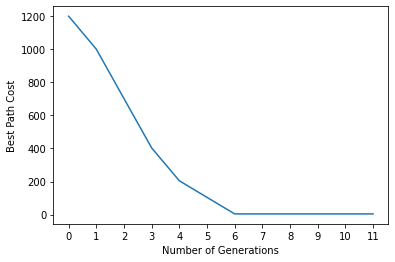

In [69]:
plt.plot(cost_g)
plt.xlabel('Number of Generations')
plt.ylabel('Best Path Cost')
plt.xticks(range(0,12))
plt.show()

In [33]:
max(generations)

11

In [34]:
min(generations)

5

In [35]:
f = np.zeros(15)
for i in generations:
    f[i] += 1
print(f)

[ 0.  0.  0.  0.  0.  2. 40. 88. 51. 16.  2.  1.  0.  0.  0.]
